<bound method NDFrame.head of            Date          Open          High           Low         Close  \
0    1985-01-01    247.100006    278.899994    245.800003    278.700012   
1    1985-02-01    277.899994    289.299988    277.899994    284.200012   
2    1985-03-01    285.100006    287.799988    275.600006    279.200012   
3    1985-04-01    279.500000    284.799988    276.200012    280.600006   
4    1985-05-01    280.500000    294.799988    278.799988    290.799988   
..          ...           ...           ...           ...           ...   
458  2023-03-01  11447.580078  12227.929688  10982.799805  12221.910156   
459  2023-04-01  12146.089844  12245.429688  11798.769531  12226.580078   
460  2023-05-01  12210.049805  13154.290039  11925.370117  12935.290039   
461  2023-06-01  12944.459961  13864.059570  12903.629883  13591.750000   
462  2023-06-28  13506.000000  13654.136719  13495.734375  13591.750000   

        Adj Close        Volume  
0      278.700012    1782060000  
1

c:\Users\user\.conda\envs\Securities_Data_Analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\Securities_Data_Analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\.conda\envs\Securities_Data_Analysis\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


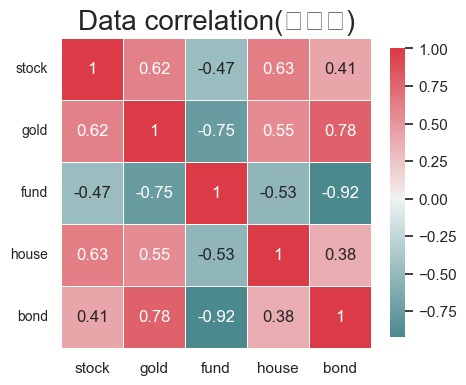

In [1]:

# 날짜 설정을 91년 ~ 각각 맞는 최신년도로 설정해준다. 그리고 날짜 때문에 잘린 index를 reset_index로 0부터 오름차순 재설정한다.
# 날짜 형태랑 컬럼 rename 정도 해준다.
# 데이터들은 결측치 제거를 drop()와 dropna()로 하였고 중복데이터를 duplicated()로 없앴다
# 0~1로 표준화를 해주고 상관관계를 분석한다. seaborn 라이브러리에서 set, diverging_palette, heatmap을 사용해서 plt로 보여준다.






import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.stats.weightstats import ztest
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from operator import itemgetter
from matplotlib.patches import Rectangle

### CSV 파일 불러오기
stock_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/나스닥(1985~2023)_yfinance.csv')
gold_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/금(1950~2023)_캐글.csv')
fund_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/미국 금리(1954~2017)_캐글2.csv')
house_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/케이스-쉴러_미국주택가격지수(1987.1~2023.4).csv')
bond_df = pd.read_csv('C:/Users/user/Desktop/Securities_Data_Analysis(Junsu)/dataset/original_data/2년만기 미국채 선물 과거 데이터.csv')

### 불러온 데이터 날 것으로 확인하기
print(stock_df.head) # 총 행렬 가져오기
print(gold_df.head)
print(fund_df.head)
print(house_df.head)
print(bond_df.head)

# 불러올 날짜 설정 - 시작지점 동일화
stock_df = stock_df[stock_df['Date'].between('1991-01-01', '2022-12-01')] 
gold_df = gold_df[gold_df['Date'].between('1991-01-01', '2022-12-01')]
fund_df = fund_df[fund_df['Date'].between('1991-01-01', '2017-01-01')]
house_df = house_df[house_df['DATE'].between('1991-01-01', '2017-01-01')]
bond_df = bond_df[bond_df['날짜'].between('1991-01-01', '2023-06-01')]

# 날짜 때문에 잘린 index를 0 부터 오름차순 재설정
stock_df = stock_df.reset_index(drop=True) 
gold_df = gold_df.reset_index(drop=True)
fund_df = fund_df.reset_index(drop=True)
house_df = house_df.reset_index(drop=True)
bond_df = bond_df.reset_index(drop=True)

gold_df = gold_df.rename(columns={'Price USD per Oz':'Gold_Price'}) # 컬럼 rename
fund_df = fund_df.rename(columns={'Effective Federal Funds Rate':'Funds_Rate'})
house_df = house_df.rename(columns={'SPCS10RSA':'House_Price', "DATE":"Date"})
bond_df = bond_df.rename(columns={'날짜':'Date', '종가':'Bond_Close'})

# print(df.columns) # 해당 파일의 행렬 개수와 열 이름 확인
# print(df.shape) # (행의 개수, 열의 개수) 출력
# print(df.info()) # 해당 파일 열의 타입과 null행 수 확인
stock_df.loc[:,'Date'] = pd.to_datetime(stock_df.Date) # 날짜를 datatime 형식으로 바꿔준다
gold_df.loc[:,'Date'] = pd.to_datetime(gold_df.Date) # 날짜를 datatime 형식으로 바꿔준다
fund_df.loc[:,'Date'] = pd.to_datetime(fund_df.Date) # 날짜를 datatime 형식으로 바꿔준다
house_df.loc[:,'Date'] = pd.to_datetime(house_df.Date) # 날짜를 datatime 형식으로 바꿔준다
bond_df.loc[:,'Date'] = pd.to_datetime(bond_df.Date) # 날짜를 datatime 형식으로 바꿔준다
# print(df.head)

######------------------------------------------------------- 데이터 전처리 -----------------------------------------------------------unt)


### 결측치 제거
# print(df.isna().sum()) # 데이터의 정합성을 확인한다

# print(df.isnull().sum()) # 컬럼 별 결측치 확인
# print(len(fund_df)-fund_df.count()) # 컬럼 별 결측치 확인
stock_df = stock_df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

fund_df = fund_df.drop(['Year', 'Month', 'Day'], axis=1) # 특정 칼럼(열) 삭제

bond_df = bond_df.drop(['시가', '고가', '저가', '변동 %'], axis = 1)
# print(df[df.isnull().any(axis=1)]) # 결측치가 하나라도 있는 행의 index와 결측치 종류를 알려준다
fund_df = fund_df.dropna(axis=0) # 결측치를 제거하는 함수 how : any/all / subset : 특정 칼럼 선택 / inplace : 데이터프레임에 바로 적용

house_df = house_df.dropna(axis=0)

bond_df = bond_df.dropna(axis=0)


### 결측치 변경
# print(df.loc[[188,191,194]]) # 특정 열을 출력
# df.loc[191, '수출금액'] = (df.loc[188, '수출금액'] + df.loc[194, '수출금액']) / 2 # 특정 행의 값으로 평균,덧셈,뺄셈으로 결측치 보완
# print(df.loc[[191]])

# df.loc[191, '무역수지'] = df.loc[188, '수출금액'] - df.loc[194, '수입금액']
# print(df.loc[[191]])



### 중복데이터
print(fund_df[fund_df.duplicated()]) # 중복이 있는 행들을 찾아 index를 알려줌
print(stock_df[stock_df.duplicated()])
print(house_df[house_df.duplicated()])
print(bond_df[bond_df.duplicated()])
print(gold_df[gold_df.duplicated()])

# df.drop_duplicates(inplace=True) # 중복 행 삭제 후 바로 적용
# print("삭제 완료")
# print(df[df.duplicated()])
# df.drop_duplicates(subset=['id'], keep='last') # 특정 열이 고유한 key를 가지는 경우 중복된 데이터 중 뒤를 남김





### 이상치
# fig, ax = plt.subplots(figsize=(9,6)) # 정규분포를 따르는지 그래프로 확인
# _ = plt.hist(df.Close, 100, density=True, alpha=0.75)
# plt.show()

# _, p = ztest(df.Close) # p가 0.05이하로 나온다면 정규분포와 거리가 멀다는 뜻
# print(p)



#######---------------------------------------- 그래프그리기 ----------------------------------------------------######
### 표준화(0~1)
scaler = MinMaxScaler()

stock_close_df = pd.DataFrame(data=stock_df.Close)
scaler.fit(stock_close_df)
stock_scaled = scaler.transform(stock_close_df)
stock_df_scaled = pd.DataFrame(data=stock_scaled)

gold_close_df = pd.DataFrame(data=gold_df.Gold_Price)
scaler.fit(gold_close_df)
gold_scaled = scaler.transform(gold_close_df)
gold_df_scaled = pd.DataFrame(data=gold_scaled)

fund_close_df = pd.DataFrame(data=fund_df.Funds_Rate)
scaler.fit(fund_close_df)
fund_scaled = scaler.transform(fund_close_df)
fund_df_scaled = pd.DataFrame(data=fund_scaled)

house_close_df = pd.DataFrame(data=house_df.House_Price)
scaler.fit(house_close_df)
house_scaled = scaler.transform(house_close_df)
house_df_scaled = pd.DataFrame(data=house_scaled)

bond_close_df = pd.DataFrame(data=bond_df.Bond_Close)
scaler.fit(bond_close_df)
bond_scaled = scaler.transform(bond_close_df)
bond_df_scaled = pd.DataFrame(data=bond_scaled)


## 주가-채권 상관관계 분석 그래프(표준화 O)
corr_df = pd.concat([stock_df_scaled, gold_df_scaled, fund_df_scaled, house_df_scaled, bond_df_scaled], axis = 1) #여기가 표준화 차이점
corr_df.columns = ['stock', 'gold', 'fund', 'house', 'bond']
# print(corr_df.head)
print("여ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ가")

corr_df = corr_df.dropna()
# print(corr_df.head)

cor = corr_df.corr()
print(cor)

sns.set(style="white")
f, ax = plt.subplots(figsize=(5, 5))
print(f, ax)

cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(cor, cmap = cmap, center=0.0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=True)

plt.title('Data correlation(표준화)', size=20)
# ax.set_xticklabels(list(corr_df.columns), size=10, rotation=90)
ax.set_yticklabels(list(corr_df.columns), size=10, rotation=0)

plt.show()


# ### 주가-채권 상관관계 분석 그래프(표준화 X)
# corr_df = pd.concat([stock_close_df, gold_close_df, fund_close_df, house_close_df, bond_close_df], axis = 1)
# corr_df.columns = ['stock', 'gold', 'fund', 'house', 'bond']
# print(corr_df)

# corr_df = corr_df.dropna()
# print(corr_df.head)

# cor = corr_df.corr()
# print(cor)

# sns.set(style="white")
# f, ax = plt.subplots(figsize=(5, 5))
# cmap = sns.diverging_palette(200, 10, as_cmap=True)
# sns.heatmap(cor, cmap = cmap, center=0.0, square=True,
#             linewidths=0.5, cbar_kws={"shrink": 0.75}, annot=True)

# plt.title('Data correlation', size=20)
# ax.set_xticklabels(list(corr_df.columns), size=10, rotation=90)
# ax.set_yticklabels(list(corr_df.columns), size=10, rotation=0)

# plt.show()